In [1]:
import pandas as pd
from sdatta_learn.loader.load_from_postgres import get_all_table, get_sales_between_dates
import os

In [2]:
relevant_stores_list = ["100",
                        "117",
                        "119",
                        "123",
                        "130",
                        "133",
                        "135",
                        "136",
                        "141",
                        "143",
                        "144",
                        "149",
                        "150",
                        "152",
                        "162",
                        "164",
                        "166",
                        "167",
                        "168",
                        "171",
                        "172",
                        "175",
                        "179",
                        "18",
                        "181",
                        "184",
                        "185",
                        "186",
                        "188",
                        "189",
                        "202",
                        "214",
                        "216",
                        "217",
                        "22",
                        "226",
                        "28",
                        "29",
                        "3",
                        "3005",
                        "3202",
                        "3205",
                        "3208",
                        "4104",
                        "4123",
                        "4129",
                        "4134",
                        "44",
                        "4803",
                        "4805",
                        "4904",
                        "4906",
                        "51",
                        "57",
                        "63",
                        "73",
                        "74",
                        "76",
                        "79",
                        "88",
                        "89",
                        "91",
                        "96"]

In [3]:
sales_data = pd.read_csv('/Users/guybasson/Desktop/sdatta-nlp/palmers_fashion/f_sales_v_fashion.csv')

In [4]:
sales_data = sales_data[sales_data['fashiongrade'] == 'M']
sales_data = sales_data[sales_data['store'].astype(str).isin(relevant_stores_list)]

In [5]:
sales_data['item'] = sales_data['sku'].astype(str).str[:12]

In [6]:
sales_data_g_item = sales_data.groupby(['date','item'])['sales'].sum().reset_index()

In [7]:
sales_data_g_item['date'] = pd.to_datetime(sales_data_g_item['date'])

In [8]:
# sales of sum for each item in 2023 that are large then 0 and fashiongrade is 'M'
items_sales_in_2023 = sales_data_g_item[sales_data_g_item['date'].dt.year == 2023].groupby('item')['sales'].sum().sort_values(ascending=False)[sales_data_g_item[sales_data_g_item['date'].dt.year == 2023].groupby('item')['sales'].sum().sort_values(ascending=False) > 0].index


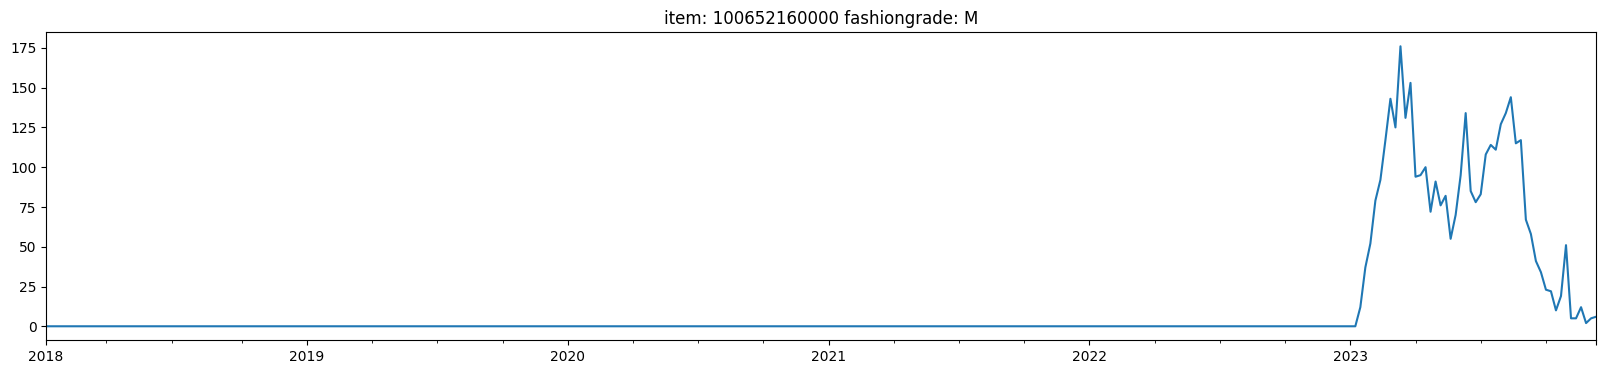

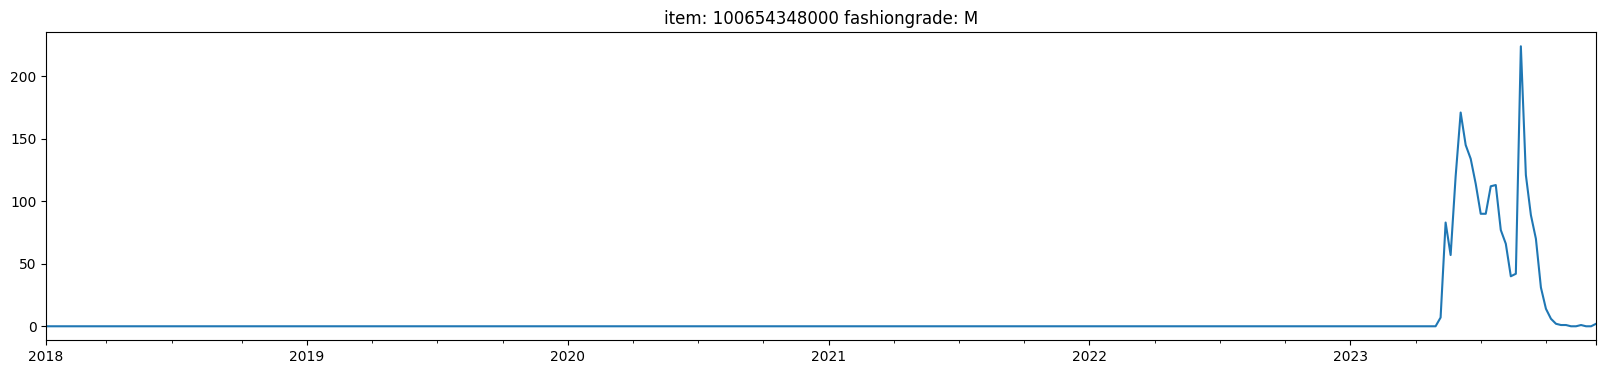

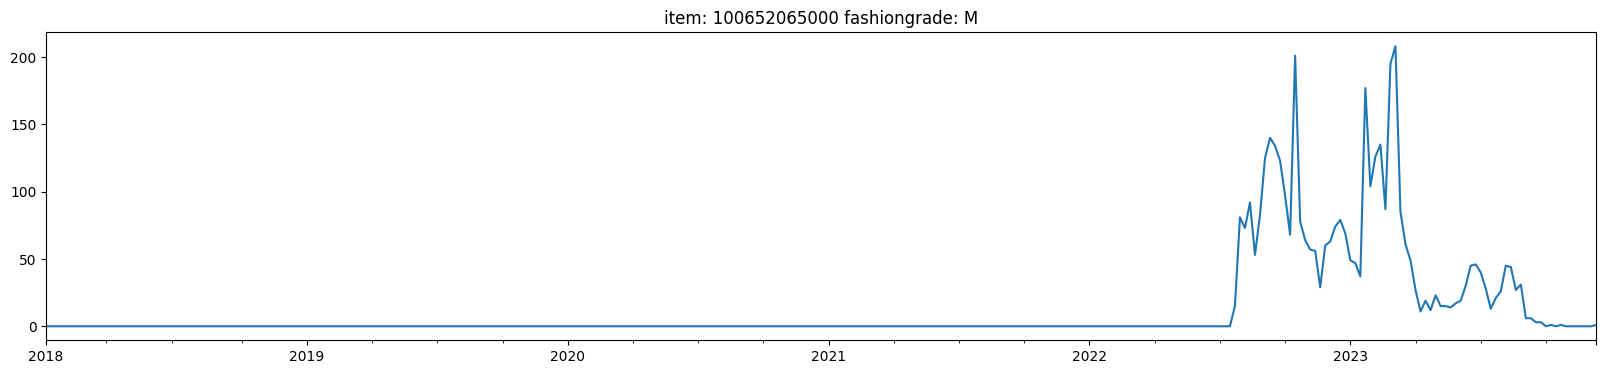

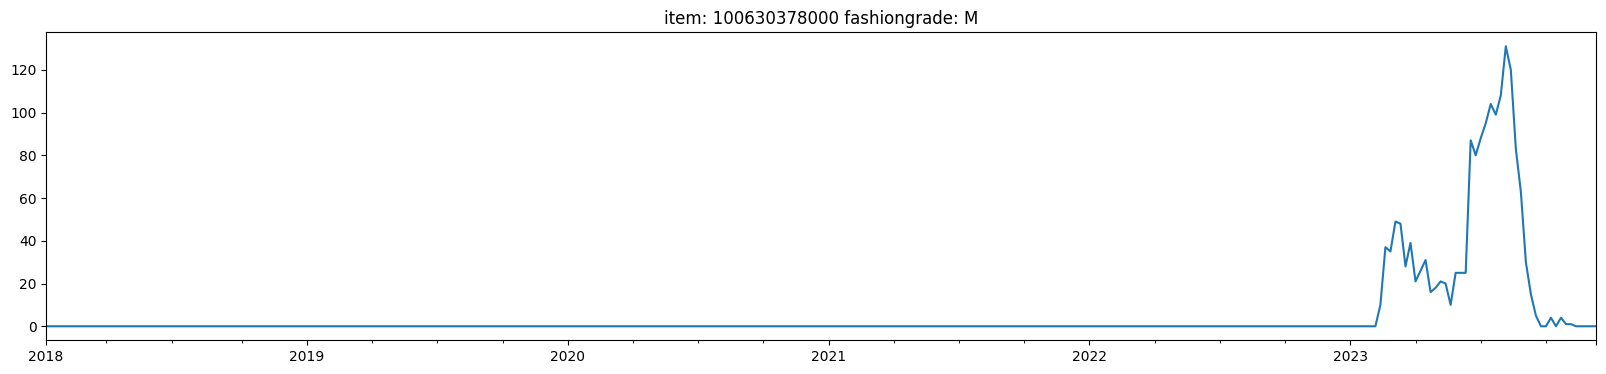

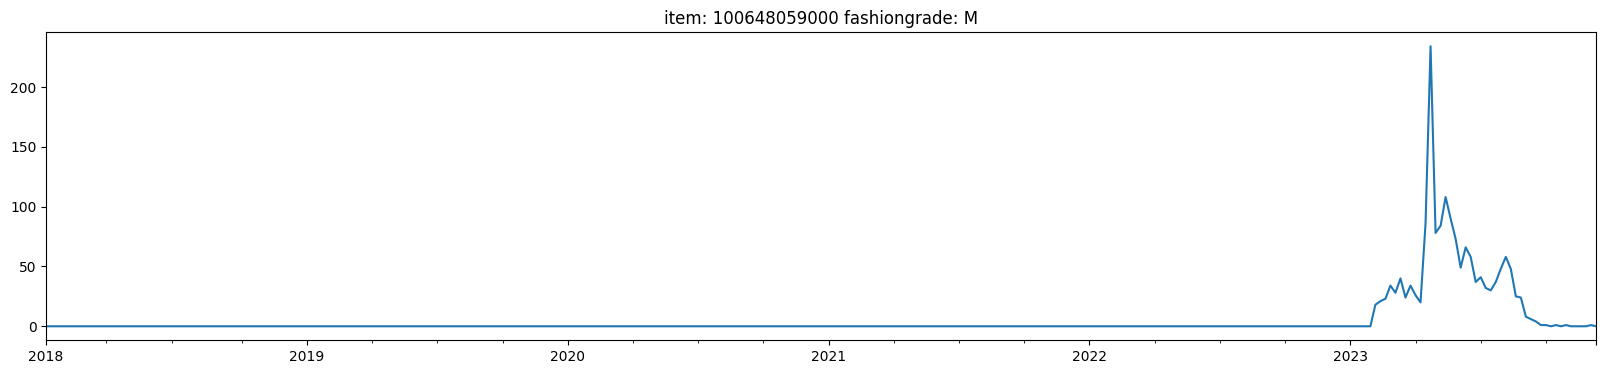

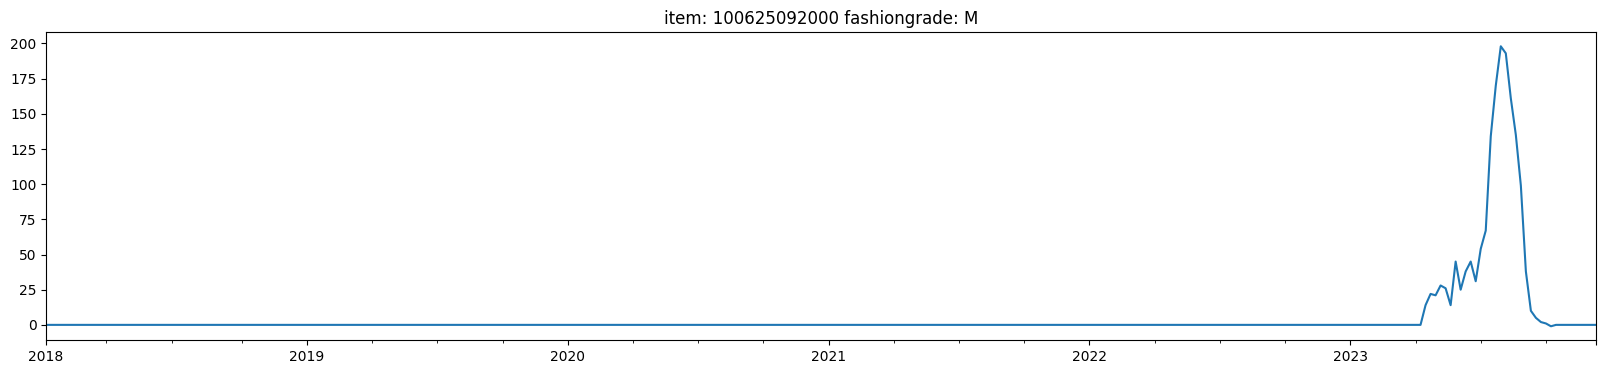

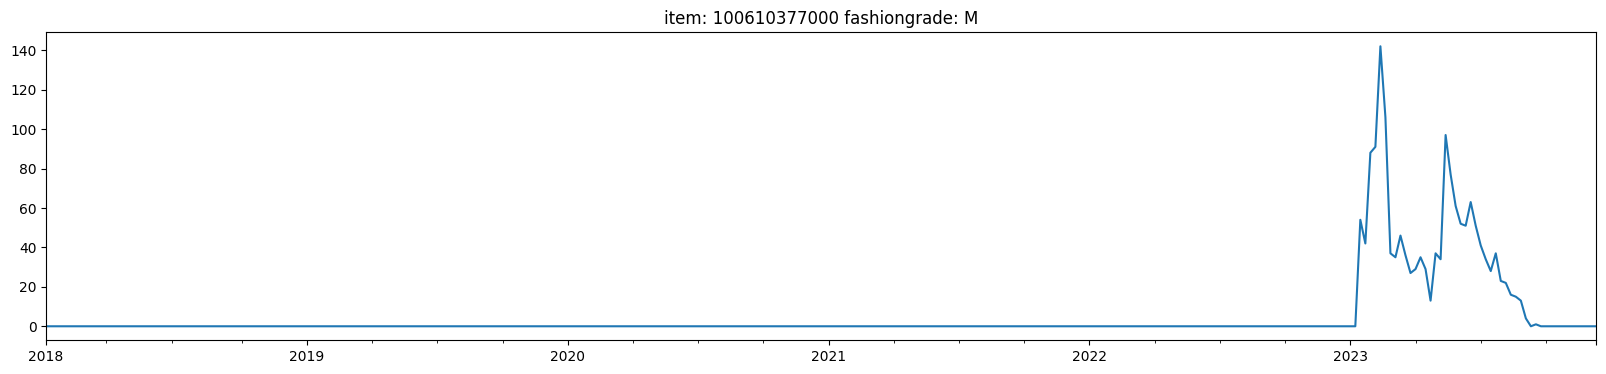

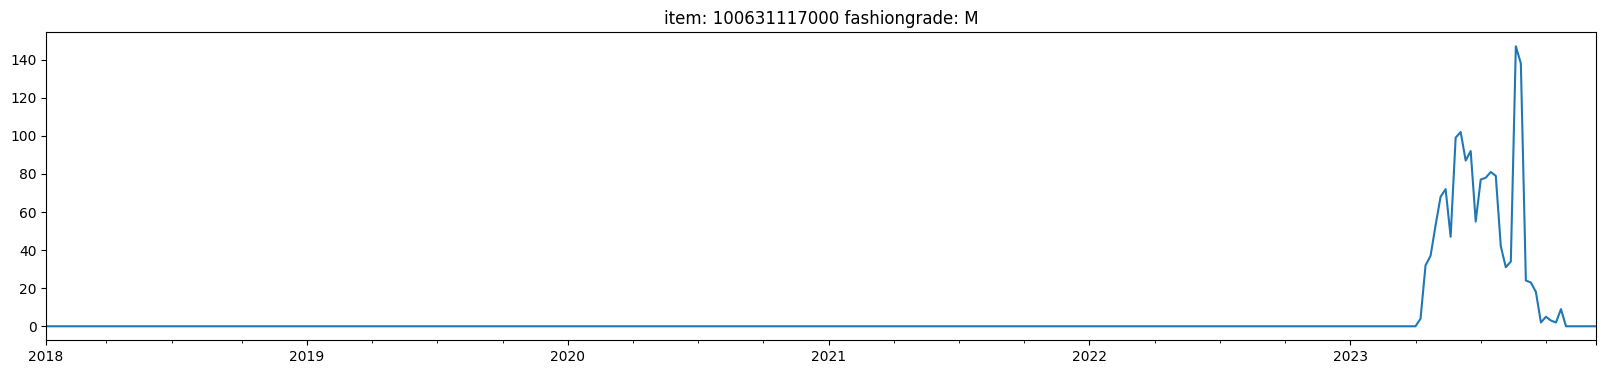

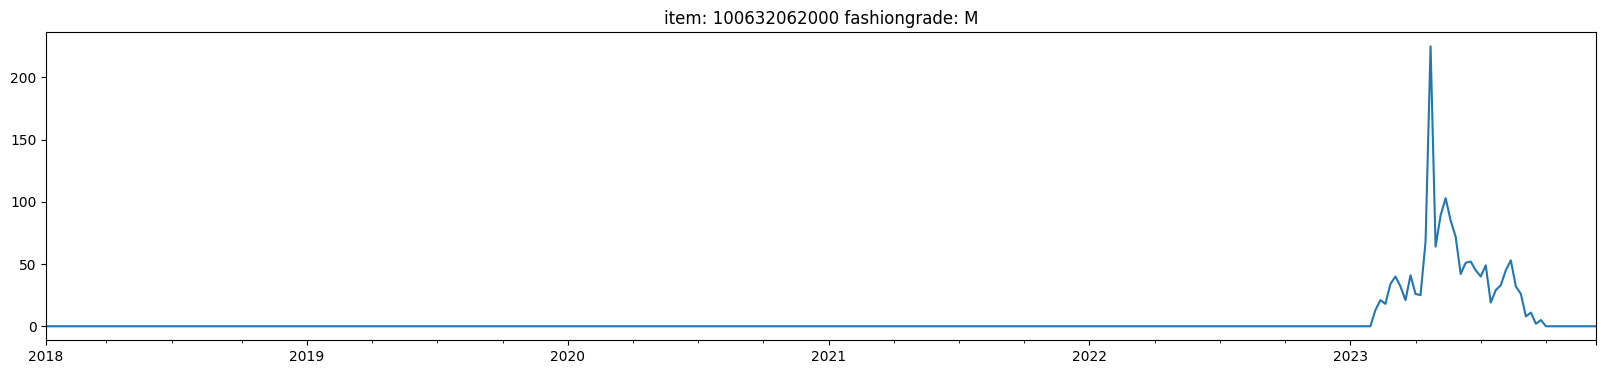

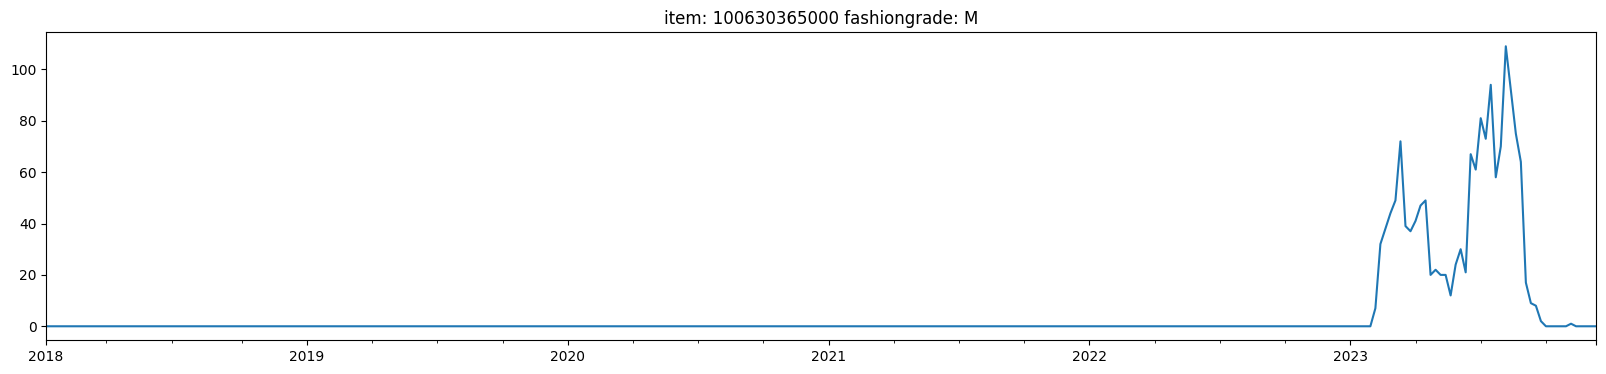

In [10]:
import matplotlib.pyplot as plt
for item in items_sales_in_2023[:10]:
    item_data = sales_data_g_item[sales_data_g_item['item'] == item].set_index('date')['sales']
    fashiongrade = sales_data[sales_data['item'] == item]['fashiongrade'].unique()[0]
    # reindex to fill in missing dates
    item_data = item_data.reindex(pd.date_range(start=sales_data_g_item['date'].min(),
                                                # today
                                                end=sales_data_g_item['date'].max(),

                                                freq='D')).fillna(0)
    item_data_w = item_data.resample('W').sum()
    # fig size
    plt.figure(figsize=(20,4))
    plt.title('item: ' + item + ' fashiongrade: ' + str(fashiongrade))
    item_data_w.plot()
    plt.show()

In [11]:
sales_data_g_item['item'].nunique()

5459

In [ ]:
item_data.set_index('date')
